In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv (r".\Classified Data", index_col=0)

In [93]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Using KNN we need a standardised dataset as the variance between points is important for clustering 

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
scaler = StandardScaler()

#### scale the data (not target)

In [157]:
X_scaled = scaler.fit_transform (df.drop("TARGET CLASS", axis = 1))

In [158]:
y = df["TARGET CLASS"]

#### create Training / Testing data 

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

#### Run algo 

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier(n_neighbors=1)   #using only one nearest neighbor 

In [163]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [164]:
y_pred = knn.predict(X_test)

#### Evaluate

In [165]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [166]:
print(confusion_matrix(y_test,y_pred))
print( classification_report(y_test, y_pred) )

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [167]:
accuracy_score(y_test,y_pred)

0.9233333333333333

### lets change our parameters ( n_neighbors) so see which is best - do this with a func

### Error rates
np.mean(y_test!=y_pred)

### Accuracy 
np.sum(y_test==y_pred)/ len(y_test)  <b>OR</b> use sklearn.preprocessing import <b> accuracy_score </b>

In [168]:
all_accuracies = []
all_error_rates = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    all_accuracies.append(accuracy_score(y_test,y_pred) ) 
    all_error_rates.append(np.mean(y_test!=y_pred))

In [136]:
all_accuracies[:5]

[0.9233333333333333, 0.91, 0.95, 0.93, 0.9433333333333334]

Text(0.5, 1.0, 'Accuracy per number n_neighbors')

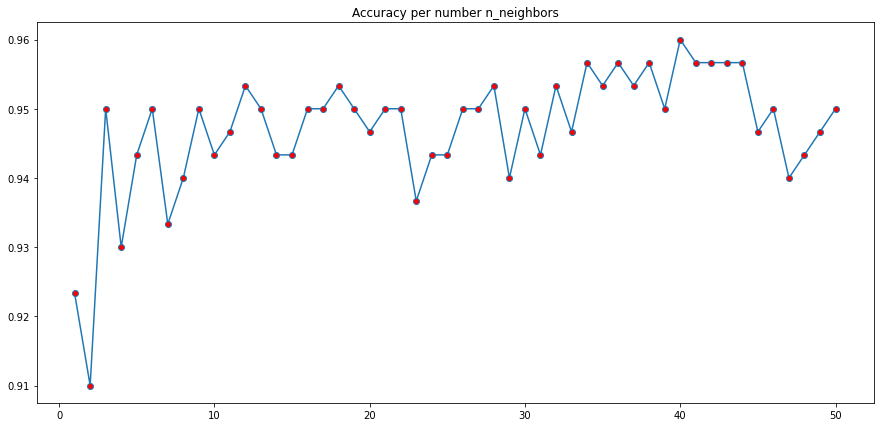

In [137]:
plt.figure(figsize= (15,7))
plt.plot(range(1,51), all_accuracies ,marker = "o", markerfacecolor = "r")
plt.title("Accuracy per number n_neighbors")

Text(0.5, 1.0, 'Error rate')

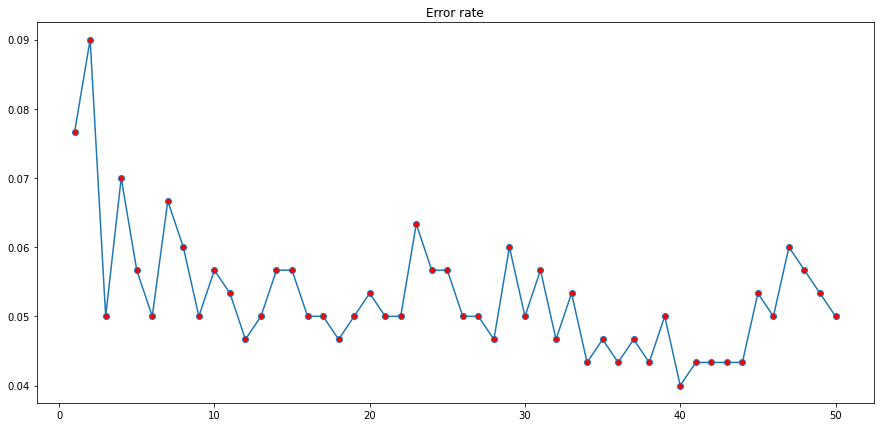

In [169]:
plt.figure(figsize= (15,7))
plt.plot(range(1,51), all_error_rates ,marker = "o", markerfacecolor = "r")
plt.title("Error rate")

### 40 n_neighbors seems the best - but not as stable
but its fine for now

In [153]:
knn = KNeighborsClassifier (n_neighbors=40) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
|